In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, \
    PrecisionRecallDisplay, RocCurveDisplay, mean_squared_error, \
    r2_score

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\Utente\\Desktop': ['.ipynb_checkpoints', '21_explainable_machine_learning.ipynb', 'Anaconda Navigator (anaconda3).lnk', 'anomalyyyyyy.jpg', 'Azure Data Studio.lnk', 'Bando-Erasmus-2022.pdf.pdf', 'churn.csv', 'Coro', 'data_preparation.py', 'desktop.ini', 'Discord.lnk', 'Documenti Personali', 'Documento.pdf', 'ETS-Official-Guide-to-the-TOEFL.pdf', 'Explainability.docx', 'Git-2.35.1.2-64-bit.exe', 'GLUTEI A CUORE.pdf', 'Grammarly.lnk', 'JRS210315.jar', 'lia.pdf', 'lloreeeee explaine.ipynb', 'lore', 'Microsoft Teams (work or school).lnk', 'Motifs.docx', 'PyCharm Community Edition 2021.1.3 x64.lnk', 'subject_train.txt', 'travel homework Lia Trapanese.docx', 'UCI HAR Dataset.zip', 'Università', 'Visual Paradigm 16.3.lnk', 'Wondershare Filmora X.lnk', 'WoPeD.lnk', '[FINAL] Data_Mining___Advanced_Topics_and_Applications.pdf', '__MACOSX', '~$ segnale analogico è una forma d.docx', '~$i Anna.docx', '~$LAZIONE SERIA.docx', '~$Motifs.docx', '~$ti di calcolatori appunti.docx', 

In [2]:
X_train = pd.read_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\best_X_train_w6.csv", index_col=0)
X_test = pd.read_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\best_X_test_w6.csv", index_col=0)
y_train = pd.read_csv(r"\Users\\Utente\\Desktop\\Università\\Pisa\\Secondo semestre - Secondo anno\\Data Mining 2\\progetto\y_train_w6.csv", index_col=0)
y_test= pd.read_csv(r"C:\Users\Utente\Desktop\Università\Pisa\Secondo semestre - Secondo anno\Data Mining 2\progetto\y_test_w6.csv", index_col=0)

In [3]:
#1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       #4:'SITTING', 5:'STANDING',6:'LAYING'
X_train['Activity']= y_train.copy()
X_trainfilter= X_train.loc[(X_train['Activity']== 2) | (X_train['Activity']== 3) ]


In [4]:
X_trainfilter

tBodyAcc-correlation()-X,Y  tGravityAcc-mean()-X  tGravityAcc-max()-Y  \
123                    -0.587194              0.931186            -0.245630   
124                    -0.659610              0.947062            -0.242397   
125                    -0.575361              0.959299            -0.226928   
126                    -0.492373              0.958983            -0.226928   
127                    -0.337743              0.949462            -0.230184   
...                          ...                   ...                  ...   
7269                   -0.211822              0.923148            -0.214233   
7270                   -0.198555              0.918343            -0.231477   
7271                   -0.226826              0.919810            -0.249134   
7272                   -0.257775              0.922323            -0.244267   
7273                   -0.266442              0.918707            -0.240956   

      tGravityAcc-max()-Z  tGravityAcc-min()-X  tGravityAcc-min()-Y  \
123             -0.020683             0.932294            -0.236679   
124             -0.010056             0.936635            -0.225627   
125             -0.009324             0.970016            -0.200408   
126             -0.009324             0.959434            -0.200329   
127             -0.018954             0.958984            -0.195488   
...                   ...                  ...                  ...   
7269            -0.016391             0.920554            -0.234998   
7270            -0.016391             0.920554            -0.234998   
7271             0.024684             0.933008            -0.216004   
7272             0.024684             0.933008            -0.210542   
7273             0.003031             0.916729            -0.212149   

      tGravityAcc-min()-Z  tGravityAcc-energy()-Y  tGravityAcc-arCoeff()-X,3  \
123             -0.049619               -0.895692                  -0.761443   
124             -0.024618               -0.912807                  -0.718395   
125             -0.028986               -0.920881                  -0.415116   
126             -0.051936               -0.923818                  -0.589255   
127             -0.051936               -0.923262                  -0.668357   
...                   ...                     ...                        ...   
7269            -0.071977               -0.918375                  -0.697090   
7270            -0.068919               -0.902880                  -0.694761   
7271            -0.068919               -0.907561                  -0.677800   
7272            -0.040009               -0.910648                  -0.702518   
7273            -0.047491               -0.910579                  -0.691012   

      tGravityAcc-arCoeff()-Y,3  ...  tBodyGyro-correlation()-Y,Z  \
123                   -0.318367  ...                    -0.370510   
124                   -0.306523  ...                    -0.510195   
125                   -0.249192  ...                    -0.435130   
126                   -0.298063  ...                    -0.286402   
127                   -0.301244  ...                    -0.410677   
...                         ...  ...                          ...   
7269                  -0.700438  ...                     0.337338   
7270                  -0.667777  ...                     0.406319   
7271                  -0.471838  ...                     0.483839   
7272                  -0.427343  ...                     0.376823   
7273                  -0.496321  ...                     0.188922   

      tBodyAccMag-arCoeff()1  fBodyAcc-bandsEnergy()-1,8  \
123                -0.107066                   -0.607738   
124                 0.013206                   -0.465401   
125                -0.035541                   -0.533181   
126                -0.122338                   -0.596853   
127                -0.125335                   -0.368973   
...                      ...                         .

In [5]:
X_trainfilter.reset_index(inplace=True)
X_trainfilter.drop(columns='index', inplace=True)


In [6]:
X_trainfilter


tBodyAcc-correlation()-X,Y  tGravityAcc-mean()-X  tGravityAcc-max()-Y  \
0                      -0.587194              0.931186            -0.245630   
1                      -0.659610              0.947062            -0.242397   
2                      -0.575361              0.959299            -0.226928   
3                      -0.492373              0.958983            -0.226928   
4                      -0.337743              0.949462            -0.230184   
...                          ...                   ...                  ...   
2016                   -0.211822              0.923148            -0.214233   
2017                   -0.198555              0.918343            -0.231477   
2018                   -0.226826              0.919810            -0.249134   
2019                   -0.257775              0.922323            -0.244267   
2020                   -0.266442              0.918707            -0.240956   

      tGravityAcc-max()-Z  tGravityAcc-min()-X  tGravityAcc-min()-Y  \
0               -0.020683             0.932294            -0.236679   
1               -0.010056             0.936635            -0.225627   
2               -0.009324             0.970016            -0.200408   
3               -0.009324             0.959434            -0.200329   
4               -0.018954             0.958984            -0.195488   
...                   ...                  ...                  ...   
2016            -0.016391             0.920554            -0.234998   
2017            -0.016391             0.920554            -0.234998   
2018             0.024684             0.933008            -0.216004   
2019             0.024684             0.933008            -0.210542   
2020             0.003031             0.916729            -0.212149   

      tGravityAcc-min()-Z  tGravityAcc-energy()-Y  tGravityAcc-arCoeff()-X,3  \
0               -0.049619               -0.895692                  -0.761443   
1               -0.024618               -0.912807                  -0.718395   
2               -0.028986               -0.920881                  -0.415116   
3               -0.051936               -0.923818                  -0.589255   
4               -0.051936               -0.923262                  -0.668357   
...                   ...                     ...                        ...   
2016            -0.071977               -0.918375                  -0.697090   
2017            -0.068919               -0.902880                  -0.694761   
2018            -0.068919               -0.907561                  -0.677800   
2019            -0.040009               -0.910648                  -0.702518   
2020            -0.047491               -0.910579                  -0.691012   

      tGravityAcc-arCoeff()-Y,3  ...  tBodyGyro-correlation()-Y,Z  \
0                     -0.318367  ...                    -0.370510   
1                     -0.306523  ...                    -0.510195   
2                     -0.249192  ...                    -0.435130   
3                     -0.298063  ...                    -0.286402   
4                     -0.301244  ...                    -0.410677   
...                         ...  ...                          ...   
2016                  -0.700438  ...                     0.337338   
2017                  -0.667777  ...                     0.406319   
2018                  -0.471838  ...                     0.483839   
2019                  -0.427343  ...                     0.376823   
2020                  -0.496321  ...                     0.188922   

      tBodyAccMag-arCoeff()1  fBodyAcc-bandsEnergy()-1,8  \
0                  -0.107066                   -0.607738   
1                   0.013206                   -0.465401   
2                  -0.035541                   -0.533181   
3                  -0.122338                   -0.596853   
4                  -0.125335                   -0.368973   
...                      ...                         .

In [7]:
y_trainfilter= X_trainfilter[['Activity']]
X_trainfilter.drop(columns='Activity', inplace=True)

In [8]:
y_trainfilter

Activity
0            3
1            3
2            3
3            3
4            3
...        ...
2016         2
2017         2
2018         2
2019         2
2020         2

[2021 rows x 1 columns]

In [9]:
#1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       #4:'SITTING', 5:'STANDING',6:'LAYING'
X_test['Activity']= y_test
X_testfilter= X_test.loc[(X_test['Activity']== 2) | (X_test['Activity']== 3) ]


In [10]:
X_testfilter

tBodyAcc-correlation()-X,Y  tGravityAcc-mean()-X  tGravityAcc-max()-Y  \
109                    -0.615793              0.888435            -0.358643   
110                    -0.726493              0.904154            -0.366161   
111                    -0.792059              0.917786            -0.360295   
112                    -0.742063              0.918580            -0.350519   
113                    -0.661944              0.910027            -0.350519   
...                          ...                   ...                  ...   
2942                   -0.258908              0.890968            -0.278442   
2943                   -0.249325              0.891281            -0.278442   
2944                   -0.351080              0.890897            -0.273818   
2945                   -0.190791              0.892736            -0.272785   
2946                   -0.080295              0.894331            -0.272785   

      tGravityAcc-max()-Z  tGravityAcc-min()-X  tGravityAcc-min()-Y  \
109              0.027783             0.901832            -0.343127   
110              0.027783             0.901832            -0.348208   
111              0.021917             0.917620            -0.348208   
112              0.024384             0.922507            -0.339413   
113              0.024384             0.900152            -0.327605   
...                   ...                  ...                  ...   
2942             0.226640             0.903413            -0.272203   
2943             0.220590             0.903793            -0.268172   
2944             0.220590             0.903793            -0.268172   
2945             0.231517             0.909007            -0.244744   
2946             0.233821             0.909007            -0.242839   

      tGravityAcc-min()-Z  tGravityAcc-energy()-Y  tGravityAcc-arCoeff()-X,3  \
109              0.008899               -0.784611                  -0.605268   
110              0.000327               -0.765016                  -0.724185   
111             -0.001731               -0.765695                  -0.728656   
112             -0.001731               -0.791412                  -0.736840   
113              0.009086               -0.791879                  -0.765985   
...                   ...                     ...                        ...   
2942            -0.243507               -0.870515                  -0.560114   
2943            -0.243507               -0.872342                  -0.583433   
2944            -0.245178               -0.871197                  -0.598919   
2945            -0.245178               -0.884788                  -0.466692   
2946            -0.245060               -0.885692                  -0.514788   

      tGravityAcc-arCoeff()-Y,3  ...  tBodyGyro-correlation()-Y,Z  \
109                   -0.324393  ...                    -0.341987   
110                   -0.536440  ...                    -0.337347   
111                   -0.327644  ...                    -0.356306   
112                   -0.176357  ...                    -0.249989   
113                   -0.330974  ...                    -0.157973   
...                         ...  ...                          ...   
2942                  -0.716222  ...                     0.340033   
2943                  -0.538037  ...                     0.272670   
2944                  -0.559421  ...                     0.236729   
2945                  -0.670957  ...                     0.185292   
2946                  -0.579835  ...                     0.123748   

      tBodyAccMag-arCoeff()1  fBodyAcc-bandsEnergy()-1,8  \
109                -0.293642                   -0.591974   
110                -0.214521                   -0.541021   
111                -0.187883                   -0.613559   
112                -0.258227                   -0.670601   
113                -0.221930                   -0.659683   
...                      ...                         .

In [11]:
X_testfilter.reset_index(inplace=True)
X_testfilter.drop(columns='index')

tBodyAcc-correlation()-X,Y  tGravityAcc-mean()-X  tGravityAcc-max()-Y  \
0                     -0.615793              0.888435            -0.358643   
1                     -0.726493              0.904154            -0.366161   
2                     -0.792059              0.917786            -0.360295   
3                     -0.742063              0.918580            -0.350519   
4                     -0.661944              0.910027            -0.350519   
..                          ...                   ...                  ...   
886                   -0.258908              0.890968            -0.278442   
887                   -0.249325              0.891281            -0.278442   
888                   -0.351080              0.890897            -0.273818   
889                   -0.190791              0.892736            -0.272785   
890                   -0.080295              0.894331            -0.272785   

     tGravityAcc-max()-Z  tGravityAcc-min()-X  tGravityAcc-min()-Y  \
0               0.027783             0.901832            -0.343127   
1               0.027783             0.901832            -0.348208   
2               0.021917             0.917620            -0.348208   
3               0.024384             0.922507            -0.339413   
4               0.024384             0.900152            -0.327605   
..                   ...                  ...                  ...   
886             0.226640             0.903413            -0.272203   
887             0.220590             0.903793            -0.268172   
888             0.220590             0.903793            -0.268172   
889             0.231517             0.909007            -0.244744   
890             0.233821             0.909007            -0.242839   

     tGravityAcc-min()-Z  tGravityAcc-energy()-Y  tGravityAcc-arCoeff()-X,3  \
0               0.008899               -0.784611                  -0.605268   
1               0.000327               -0.765016                  -0.724185   
2              -0.001731               -0.765695                  -0.728656   
3              -0.001731               -0.791412                  -0.736840   
4               0.009086               -0.791879                  -0.765985   
..                   ...                     ...                        ...   
886            -0.243507               -0.870515                  -0.560114   
887            -0.243507               -0.872342                  -0.583433   
888            -0.245178               -0.871197                  -0.598919   
889            -0.245178               -0.884788                  -0.466692   
890            -0.245060               -0.885692                  -0.514788   

     tGravityAcc-arCoeff()-Y,3  ...  tBodyGyro-correlation()-Y,Z  \
0                    -0.324393  ...                    -0.341987   
1                    -0.536440  ...                    -0.337347   
2                    -0.327644  ...                    -0.356306   
3                    -0.176357  ...                    -0.249989   
4                    -0.330974  ...                    -0.157973   
..                         ...  ...                          ...   
886                  -0.716222  ...                     0.340033   
887                  -0.538037  ...                     0.272670   
888                  -0.559421  ...                     0.236729   
889                  -0.670957  ...                     0.185292   
890                  -0.579835  ...                     0.123748   

     tBodyAccMag-arCoeff()1  fBodyAcc-bandsEnergy()-1,8  \
0                 -0.293642                   -0.591974   
1                 -0.214521                   -0.541021   
2                 -0.187883                   -0.613559   
3                 -0.258227                   -0.670601   
4                 -0.221930                   -0.659683   
..                      ...                         ...   
886               -0.350785                   -0

In [12]:
y_testfilter= X_testfilter[['Activity']]
X_testfilter.drop(columns='index', inplace=True)

In [13]:
X_testfilter.drop(columns='Activity', inplace=True)

In [14]:
X_testfilter

tBodyAcc-correlation()-X,Y  tGravityAcc-mean()-X  tGravityAcc-max()-Y  \
0                     -0.615793              0.888435            -0.358643   
1                     -0.726493              0.904154            -0.366161   
2                     -0.792059              0.917786            -0.360295   
3                     -0.742063              0.918580            -0.350519   
4                     -0.661944              0.910027            -0.350519   
..                          ...                   ...                  ...   
886                   -0.258908              0.890968            -0.278442   
887                   -0.249325              0.891281            -0.278442   
888                   -0.351080              0.890897            -0.273818   
889                   -0.190791              0.892736            -0.272785   
890                   -0.080295              0.894331            -0.272785   

     tGravityAcc-max()-Z  tGravityAcc-min()-X  tGravityAcc-min()-Y  \
0               0.027783             0.901832            -0.343127   
1               0.027783             0.901832            -0.348208   
2               0.021917             0.917620            -0.348208   
3               0.024384             0.922507            -0.339413   
4               0.024384             0.900152            -0.327605   
..                   ...                  ...                  ...   
886             0.226640             0.903413            -0.272203   
887             0.220590             0.903793            -0.268172   
888             0.220590             0.903793            -0.268172   
889             0.231517             0.909007            -0.244744   
890             0.233821             0.909007            -0.242839   

     tGravityAcc-min()-Z  tGravityAcc-energy()-Y  tGravityAcc-arCoeff()-X,3  \
0               0.008899               -0.784611                  -0.605268   
1               0.000327               -0.765016                  -0.724185   
2              -0.001731               -0.765695                  -0.728656   
3              -0.001731               -0.791412                  -0.736840   
4               0.009086               -0.791879                  -0.765985   
..                   ...                     ...                        ...   
886            -0.243507               -0.870515                  -0.560114   
887            -0.243507               -0.872342                  -0.583433   
888            -0.245178               -0.871197                  -0.598919   
889            -0.245178               -0.884788                  -0.466692   
890            -0.245060               -0.885692                  -0.514788   

     tGravityAcc-arCoeff()-Y,3  ...  tBodyGyro-min()-X  \
0                    -0.324393  ...           0.607651   
1                    -0.536440  ...           0.610022   
2                    -0.327644  ...           0.281634   
3                    -0.176357  ...           0.281634   
4                    -0.330974  ...           0.579455   
..                         ...  ...                ...   
886                  -0.716222  ...           0.400695   
887                  -0.538037  ...           0.426308   
888                  -0.559421  ...           0.426308   
889                  -0.670957  ...           0.448908   
890                  -0.579835  ...           0.430574   

     tBodyGyro-correlation()-Y,Z  tBodyAccMag-arCoeff()1  \
0                      -0.341987               -0.293642   
1                      -0.337347               -0.214521   
2                      -0.356306               -0.187883   
3                      -0.249989               -0.258227   
4                      -0.157973               -0.221930   
..                           ...                     ...   
886                     0.340033               -0.350785   
887                     0.272670               -0.374953   
888                     0.236729         

Formatto i nomi delle colonne per rimovere i caratteri indesiderati

In [15]:
import re
X_trainnew= X_trainfilter.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_testnew= X_testfilter.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

## Training classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [17]:
clf = DTC(random_state=42)

clf.fit(X_trainnew, y_trainfilter)
y_pred = clf.predict(X_testnew)

In [18]:
print(classification_report(y_testfilter, y_pred))

              precision    recall  f1-score   support

           2       0.84      0.92      0.88       471
           3       0.90      0.80      0.85       420

    accuracy                           0.86       891
   macro avg       0.87      0.86      0.86       891
weighted avg       0.86      0.86      0.86       891



## Lime

In [19]:
from lime.lime_tabular import LimeTabularExplainer
import lime
from lime import lime_tabular

In [20]:
from lime.lime_tabular import LimeTabularExplainer
class_names = ['WALK_UP', 'WALK_DOWN']

#instantiate the explanations for the data set
limeexplainer = LimeTabularExplainer(X_testfilter.values, class_names= class_names, feature_names = X_testfilter.columns, discretize_continuous = True)
idx=8 # the rows of the dataset
explainable_exp = limeexplainer.explain_instance(X_testfilter.values[idx], clf.predict_proba, num_features=23) #labels=class_names)
explainable_exp.show_in_notebook(show_table=True, show_all=False)

In [21]:
y_testfilter['Activity'][8]

3

In [22]:
y_pred[8]

3

# Shap

In [23]:
import shap

shap.initjs()

In [45]:
# compute SHAP values
explainer = shap.TreeExplainer(clf)
shap_values= explainer.shap_values(X_trainnew)

In [33]:
class_names[0]

'WALK_UP'

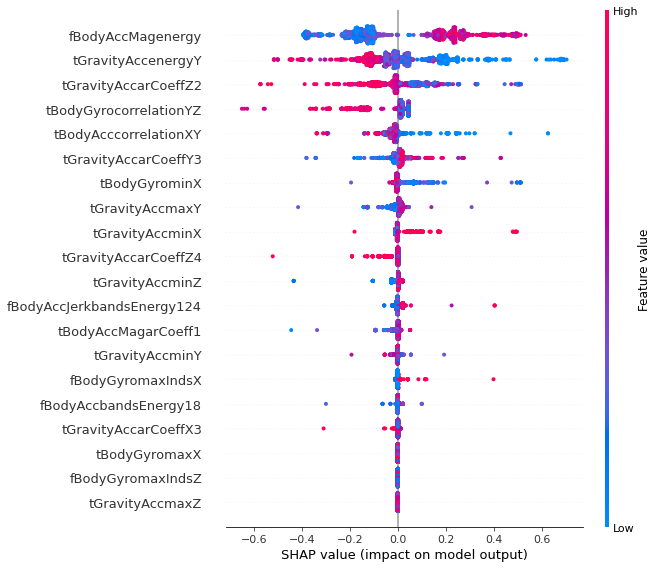

In [51]:
shap.summary_plot(shap_values[1], X_trainnew, title="SHAP summary plot" , class_names= class_names) 


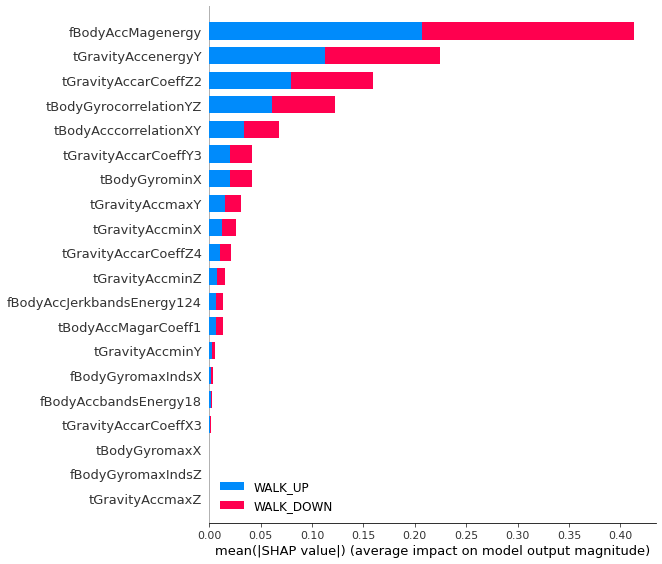

In [50]:
shap.summary_plot(shap_values, X_trainnew.values, feature_names= X_trainnew.columns, class_names=class_names)


In [49]:
X_trainnew.columns

Index(['tBodyAcccorrelationXY', 'tGravityAccmeanX', 'tGravityAccmaxY',
       'tGravityAccmaxZ', 'tGravityAccminX', 'tGravityAccminY',
       'tGravityAccminZ', 'tGravityAccenergyY', 'tGravityAccarCoeffX3',
       'tGravityAccarCoeffY3', 'tGravityAccarCoeffZ2', 'tGravityAccarCoeffZ4',
       'tBodyGyromaxX', 'tBodyGyrominX', 'tBodyGyrocorrelationYZ',
       'tBodyAccMagarCoeff1', 'fBodyAccbandsEnergy18',
       'fBodyAccJerkbandsEnergy124', 'fBodyGyromaxIndsX', 'fBodyGyromaxIndsZ',
       'fBodyAccMagstd', 'fBodyAccMagenergy', 'angleYgravityMean'],
      dtype='object')

In [27]:
idx = 100 # row selected for fast runtime
select = range(idx)
features = X_testnew.iloc[select]
feature_display = X_trainnew.loc[features.index]

In [28]:
shap.initjs() # run to show the plot
shap.force_plot(explainer.expected_value[0], shap_values=shap_values[0], features=X_trainnew)